In [1]:
#Load necessary Libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px

# LOAD THE DATASET

In [3]:
# Load the dataset
df = pickle.load(open("df_umap_2D.pickle", 'rb'))
df

,x,y
0,0.965321,9.223312
1,4.396095,7.197425
2,4.704985,7.830008
3,3.932616,7.069750
4,0.138507,9.010196
...,...,...
2528,2.052044,8.872194
2529,2.768818,9.272061
2530,2.482742,7.692467
2531,1.993481,8.093008


In [15]:
df_tm_1 = pickle.load(open("6.topic_MM.pickle", 'rb'))
df_tm_2 = pickle.load(open("7.NM_topic.pickle", 'rb'))
df_tm_2.rename(columns={'topic': 'topic_cleaned'}, inplace=True)

# Append rows of df_tm_2 to df_tm_1
df_tm = pd.concat([df_tm_1, df_tm_2], axis=0)

# Reset the index of the combined dataframe
df_tm = df_tm.reset_index(drop=True)

# Display the combined dataframe
df_tm

,index,Date,Location,Title,Speech,Cleaned_Speech,Cleaned_Speech_string,topic_cleaned,prompt
0,MSS1,2004-06-24,New Delhi,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",['fellow citizen speak deep sense humility ful...,fellow citizen speak deep sense humility fully...,The author is exploring the need for reform in...,NaN
1,MSS2,2004-06-29,New Delhi,PM's inaugural address at the Chief Ministers'...,"""I welcome you all to this Conference which w...",['welcome conference take stock effort rural d...,welcome conference take stock effort rural dev...,The central theme of the text is rural develop...,NaN
2,MSS3,2004-07-03,New Delhi,"PM's inaugural address at the ""Dialogue on Min...","""It gives me great pleasure to be amongst you...","['give great pleasure amongst morning', 'parti...",give great pleasure amongst morning particular...,The central theme of the text is the empowerme...,NaN
3,MSS4,2004-07-26,New Delhi,PM's speech at the CSIR Society Meeting,"Distinguished Members of the CSIR Society, La...",['distinguished member csir society lady gentl...,distinguished member csir society lady gentlem...,The author is exploring the role of science an...,NaN
4,MSS5,2004-07-31,Bangkok,PM’ statement at the Press Conference,"\n\t""My two days in Bangkok have been very use...","['two day bangkok useful productive', 'first b...",two day bangkok useful productive first bimste...,The central theme that the author is exploring...,NaN
...,...,...,...,...,...,...,...,...,...
2528,NMS1178,2023-04-09,NaN,English rendering of PM’s address at the inaug...,My colleagues in the Union Cabinet Shri Bhupen...,['colleague union cabinet shri bhupender yadav...,colleague union cabinet shri bhupender yadav j...,"[, , A. The author is exploring the theme of e...",My colleagues in the Union Cabinet Shri Bhupen...
2529,NMS1179,2023-04-12,NaN,English rendering of PM’s address at training ...,Namaskar! \n\nThe campaign to provide governme...,"['namaskar', 'campaign provide government job ...",namaskar campaign provide government job youth...,"[, , The central theme of the author is explor...",Namaskar! The campaign to provide government j...
2530,NMS1180,2023-04-12,NaN,English rendering of PM’s address during flagg...,"Namaskar, Governor of Rajasthan Shri Kalraj Mi...",['namaskar governor rajasthan shri kalraj mish...,namaskar governor rajasthan shri kalraj mishra...,"[., , , , The central theme of the text is the...","Namaskar, Governor of Rajasthan Shri Kalraj Mi..."
2531,NMS1181,2023-04-14,NaN,English rendering of PM’s address at inaugurat...,"Governor of Assam Shri Gulab Chand Kataria ji,...",['governor assam shri gulab chand kataria ji c...,governor assam shri gulab chand kataria ji chi...,"[, , The author is exploring the idea that the...","Governor of Assam Shri Gulab Chand Kataria ji,..."


## Objective: To cluster the data using UMAPS
1. Use UMAPS to reduce the dimensionality of the data to 2 dimensions
2. Cluster the data
3. Embed Date information into the data
4. Plot the data giving each year a different color

In [7]:
%pip install umap

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install --upgrade umap-learn


Note: you may need to restart the kernel to use updated packages.


#### UMAP Model
The n_components parameter set to 2 to reduce the above dimensionality to 2 in order to get a 2-D plot.The random_state parameter allows you to control the randomness in code and ensure reproducibility to facilitate comparision.

In [8]:
df_umap_2 = pickle.load(open("df_umap_2D.pickle", 'rb'))
df_umap_2

,x,y
0,0.965321,9.223312
1,4.396095,7.197425
2,4.704985,7.830008
3,3.932616,7.069750
4,0.138507,9.010196
...,...,...
2528,2.052044,8.872194
2529,2.768818,9.272061
2530,2.482742,7.692467
2531,1.993481,8.093008


# K-Means Clustering 
It is a popular unsupervised Ml model used for clustering data points into groups based on their similarity. It partitions the data into K clusters where each data point belongs to the cluster with nearest mean.

In [2]:
# import the KMeans model
from sklearn.cluster import KMeans

# Silhouette Method

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

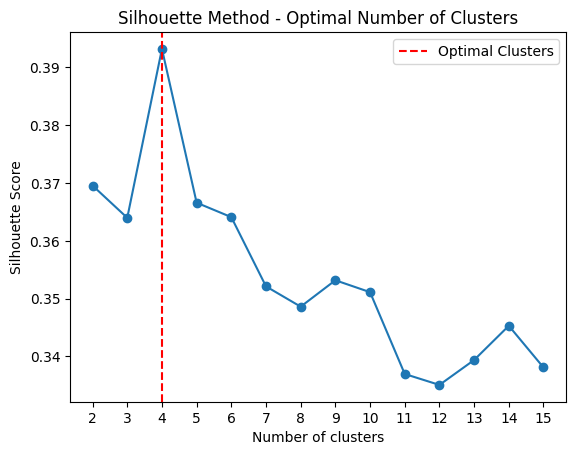

Optimal number of clusters: 4


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Create a list to store the silhouette scores
silhouette_scores = []

# Define the range of number of clusters
min_clusters = 2
max_clusters = 15

for n_clusters in range(min_clusters, max_clusters+1):
    # Create a KMeans instance with n_clusters clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model to the UMAP data
    kmeans.fit(df_umap_2)
    
    # Predict the cluster labels
    labels = kmeans.labels_
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(df_umap_2, labels)
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters based on the highest silhouette score
optimal_clusters = np.argmax(silhouette_scores) + min_clusters

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method - Optimal Number of Clusters')
plt.xticks(range(min_clusters, max_clusters+1))
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label='Optimal Clusters')
plt.legend()
plt.show()

print("Optimal number of clusters:", optimal_clusters)


In [10]:
# Create a KMeans instance with 5 clusters
model = KMeans(n_clusters=4, random_state=42)
# Fit model to df_umap
model.fit(df_umap_2)  # Assuming 'x' and 'y' are the UMAP coordinates


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

## Plot the UMAP Model

In [11]:
import plotly.express as px
import plotly.offline as offline


# Set the 'z' column values to 1 for rows up to index 1351
df_umap_2.loc[:1351, 'PM'] = 'Manmohan Singh'

# Set the 'z' column values to 2 for rows starting from index 1351
df_umap_2.loc[1351:, 'PM'] = 'Narendra Modi'

fig = px.scatter(
    df_umap_2,  # DataFrame containing the data
    x='x',          # Column name for the x-axis values
    y='y',          # Column name for the y-axis values
    color='PM',     # Column name for assigning colors based on cluster
    size_max=10,
    color_discrete_sequence = ['maroon', 'blue']          
)

# Customize the layout of the figure
fig.update_layout(
    height=800,  # Set the height of the figure
    width=1000   # Set the width of the figure
)

# Display the plot
fig.show()

# Generate HTML file with the plot
offline.plot(fig, filename='MS_NM_2D.html')


'MS_NM_2D.html'

NM speeches are not diversified whereas MS speeches are quite diversified 

In [12]:
# Load the pickled object from "0.META.pickle" file
meta_df = pickle.load(open("0.META.pickle", 'rb'))

In [13]:
meta_df

,index,Date,Title,Speech,Cleaned_Speech,Cleaned_Speech_string
0,MSS1,2004-06-24,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",['fellow citizen speak deep sense humility ful...,fellow citizen speak deep sense humility fully...
1,MSS2,2004-06-29,PM's inaugural address at the Chief Ministers'...,"""I welcome you all to this Conference which w...",['welcome conference take stock effort rural d...,welcome conference take stock effort rural dev...
2,MSS3,2004-07-03,"PM's inaugural address at the ""Dialogue on Min...","""It gives me great pleasure to be amongst you...","['give great pleasure amongst morning', 'parti...",give great pleasure amongst morning particular...
3,MSS4,2004-07-26,PM's speech at the CSIR Society Meeting,"Distinguished Members of the CSIR Society, La...",['distinguished member csir society lady gentl...,distinguished member csir society lady gentlem...
4,MSS5,2004-07-31,PM’ statement at the Press Conference,"\n\t""My two days in Bangkok have been very use...","['two day bangkok useful productive', 'first b...",two day bangkok useful productive first bimste...
...,...,...,...,...,...,...
2528,NMS1178,2023-04-09,English rendering of PM’s address at the inaug...,My colleagues in the Union Cabinet Shri Bhupen...,['colleague union cabinet shri bhupender yadav...,colleague union cabinet shri bhupender yadav j...
2529,NMS1179,2023-04-12,English rendering of PM’s address at training ...,Namaskar! \n\nThe campaign to provide governme...,"['namaskar', 'campaign provide government job ...",namaskar campaign provide government job youth...
2530,NMS1180,2023-04-12,English rendering of PM’s address during flagg...,"Namaskar, Governor of Rajasthan Shri Kalraj Mi...",['namaskar governor rajasthan shri kalraj mish...,namaskar governor rajasthan shri kalraj mishra...
2531,NMS1181,2023-04-14,English rendering of PM’s address at inaugurat...,"Governor of Assam Shri Gulab Chand Kataria ji,...",['governor assam shri gulab chand kataria ji c...,governor assam shri gulab chand kataria ji chi...


In [17]:
meta_df_req = pd.DataFrame({
    'Title': meta_df['Title'],
    'Speech': meta_df['Speech'],
    "Cleaned_Speech": meta_df["Cleaned_Speech_string"]
})


In [18]:
# Embed the date column into the UMAP model, create a new dataframe
df_dim_date = pd.concat([df_umap_2, meta_df['Date']], axis=1)

# Only keep the year in the date column, date is in string, in lambda function, convert it to datetime, and then extract the year
df_dim_date['Date'] = df_dim_date['Date'].apply(lambda x: pd.to_datetime(x).year)

# Delete the entry with year nan
df_dim_date = df_dim_date[df_dim_date['Date'] != 'nan']

# Append the cluster label to the dataframe of df_dim_date and umap
df_dim_date['cluster'] = model.labels_

# Concatenate meta_df['index'] and df_dim_date along axis 1
df_dim_date = pd.concat([meta_df['index'], df_dim_date], axis=1)

# Convert the cluster label to a string and prepend 'C' to it
df_dim_date['cluster'] = df_dim_date['cluster'].apply(lambda x: f"C{x}")

df_dim_date = pd.concat([df_dim_date,meta_df_req], axis=1)

df_dim_date = pd.concat([df_dim_date, df_tm['topic_cleaned']], axis=1)


# Display the resulting dataframe
df_dim_date


,index,x,y,PM,Date,cluster,Title,Speech,Cleaned_Speech,topic_cleaned
0,MSS1,0.965321,9.223312,Manmohan Singh,2004,C1,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",fellow citizen speak deep sense humility fully...,The author is exploring the need for reform in...
1,MSS2,4.396095,7.197425,Manmohan Singh,2004,C2,PM's inaugural address at the Chief Ministers'...,"""I welcome you all to this Conference which w...",welcome conference take stock effort rural dev...,The central theme of the text is rural develop...
2,MSS3,4.704985,7.830008,Manmohan Singh,2004,C2,"PM's inaugural address at the ""Dialogue on Min...","""It gives me great pleasure to be amongst you...",give great pleasure amongst morning particular...,The central theme of the text is the empowerme...
3,MSS4,3.932616,7.069750,Manmohan Singh,2004,C0,PM's speech at the CSIR Society Meeting,"Distinguished Members of the CSIR Society, La...",distinguished member csir society lady gentlem...,The author is exploring the role of science an...
4,MSS5,0.138507,9.010196,Manmohan Singh,2004,C1,PM’ statement at the Press Conference,"\n\t""My two days in Bangkok have been very use...",two day bangkok useful productive first bimste...,The central theme that the author is exploring...
...,...,...,...,...,...,...,...,...,...,...
2528,NMS1178,2.052044,8.872194,Narendra Modi,2023,C1,English rendering of PM’s address at the inaug...,My colleagues in the Union Cabinet Shri Bhupen...,colleague union cabinet shri bhupender yadav j...,"[, , A. The author is exploring the theme of e..."
2529,NMS1179,2.768818,9.272061,Narendra Modi,2023,C3,English rendering of PM’s address at training ...,Namaskar! \n\nThe campaign to provide governme...,namaskar campaign provide government job youth...,"[, , The central theme of the author is explor..."
2530,NMS1180,2.482742,7.692467,Narendra Modi,2023,C0,English rendering of PM’s address during flagg...,"Namaskar, Governor of Rajasthan Shri Kalraj Mi...",namaskar governor rajasthan shri kalraj mishra...,"[., , , , The central theme of the text is the..."
2531,NMS1181,1.993481,8.093008,Narendra Modi,2023,C0,English rendering of PM’s address at inaugurat...,"Governor of Assam Shri Gulab Chand Kataria ji,...",governor assam shri gulab chand kataria ji chi...,"[, , The author is exploring the idea that the..."


In [19]:
df_final = pd.DataFrame({
    "Index": df_dim_date["index"],
    "Date": meta_df["Date"],
    "PM": df_dim_date["PM"],
    "Cluster": df_dim_date["cluster"],
    'Title': df_dim_date['Title'],
    'Speech': df_dim_date['Speech'],
    "Cleaned_Speech": df_dim_date["Cleaned_Speech"],
    "Topic": df_dim_date["topic_cleaned"]
})

In [21]:
df_final=df_final.sort_values("Cluster")
df_final = df_final.reset_index(drop=True)
df_final

,Index,Date,PM,Cluster,Title,Speech,Cleaned_Speech,Topic
0,NMS1182,2023-04-15,Narendra Modi,C0,Text of Prime Minister’s video message at the ...,"President of the World Bank, Her Excellency, t...",president world bank excellency minister energ...,"[, , The author is exploring the impact of beh..."
1,NMS978,2022-07-29,Narendra Modi,C0,Text of PM’s address at the 42nd Convocation o...,"Honourable Governor of Tamil Nadu, Shri R. N. ...",honourable governor tamil nadu shri r n ravi j...,"[, , The central theme that the author is expl..."
2,NMS977,2022-07-28,Narendra Modi,C0,English rendering of PM’s address at inaugurat...,"Bharat Mata ki – Jai, Bharat Mata ki – Jai!The...",bharat mata ki jai bharat mata ki jai popular ...,"[., , The author is exploring the central them..."
3,NMS975,2022-07-25,Narendra Modi,C0,English rendering of PM’s address on 10th Puny...,Namaskar!I pay my respectful tributes to Late ...,namaskar pay respectful tribute late harmohan ...,"[, , The central theme that the author is expl..."
4,NMS973,2022-07-18,Narendra Modi,C0,English rendering of PM’s Address at NIIO Semi...,My colleagues in the Union Cabinet Shri Rajnat...,colleague union cabinet shri rajnath singh ji ...,"[), , The author is exploring the need for sel..."
...,...,...,...,...,...,...,...,...
2528,MSS1035,2011-05-27,Manmohan Singh,C3,PM's remarks at the launch of the Dar es Salaa...,"""It is a pleasure for me to inaugurate the Ind...",pleasure inaugurate india tanzania centre exce...,The author is exploring the central theme of t...
2529,MSS1032,2011-05-26,Manmohan Singh,C3,"PM's speech to the Indian Community, Dar es Sa...",I am delighted to be here among you today in D...,delighted among today dar e salaam first offic...,The central theme of the text is the strong re...
2530,MSS245,2005-12-16,Manmohan Singh,C3,PM's speech at the CII conference on Bharat Ni...,"""I am delighted to be here today to inaugurate...",delighted today inaugurate conference event ma...,The central theme that the author is exploring...
2531,MSS49,2004-11-22,Manmohan Singh,C3,PM's address at diamond jubilee celebrations ...,"""I am doubly delighted to be amongst you this...",doubly delighted amongst morning occasion brin...,The central theme of the author is exploring i...


In [22]:
df_ann_2D = open("df_ann_2D.pickle", "wb")
pickle.dump(df_final, df_ann_2D)
df_ann_2D.close()

In [24]:
df_1 = pickle.load(open("df_ann_2D.pickle", 'rb'))
df_1

,Index,Date,PM,Cluster,Title,Speech,Cleaned_Speech,Topic
0,NMS1182,2023-04-15,Narendra Modi,C0,Text of Prime Minister’s video message at the ...,"President of the World Bank, Her Excellency, t...",president world bank excellency minister energ...,"[, , The author is exploring the impact of beh..."
1,NMS978,2022-07-29,Narendra Modi,C0,Text of PM’s address at the 42nd Convocation o...,"Honourable Governor of Tamil Nadu, Shri R. N. ...",honourable governor tamil nadu shri r n ravi j...,"[, , The central theme that the author is expl..."
2,NMS977,2022-07-28,Narendra Modi,C0,English rendering of PM’s address at inaugurat...,"Bharat Mata ki – Jai, Bharat Mata ki – Jai!The...",bharat mata ki jai bharat mata ki jai popular ...,"[., , The author is exploring the central them..."
3,NMS975,2022-07-25,Narendra Modi,C0,English rendering of PM’s address on 10th Puny...,Namaskar!I pay my respectful tributes to Late ...,namaskar pay respectful tribute late harmohan ...,"[, , The central theme that the author is expl..."
4,NMS973,2022-07-18,Narendra Modi,C0,English rendering of PM’s Address at NIIO Semi...,My colleagues in the Union Cabinet Shri Rajnat...,colleague union cabinet shri rajnath singh ji ...,"[), , The author is exploring the need for sel..."
...,...,...,...,...,...,...,...,...
2528,MSS1035,2011-05-27,Manmohan Singh,C3,PM's remarks at the launch of the Dar es Salaa...,"""It is a pleasure for me to inaugurate the Ind...",pleasure inaugurate india tanzania centre exce...,The author is exploring the central theme of t...
2529,MSS1032,2011-05-26,Manmohan Singh,C3,"PM's speech to the Indian Community, Dar es Sa...",I am delighted to be here among you today in D...,delighted among today dar e salaam first offic...,The central theme of the text is the strong re...
2530,MSS245,2005-12-16,Manmohan Singh,C3,PM's speech at the CII conference on Bharat Ni...,"""I am delighted to be here today to inaugurate...",delighted today inaugurate conference event ma...,The central theme that the author is exploring...
2531,MSS49,2004-11-22,Manmohan Singh,C3,PM's address at diamond jubilee celebrations ...,"""I am doubly delighted to be amongst you this...",doubly delighted amongst morning occasion brin...,The central theme of the author is exploring i...


In [ ]:
# Print unique years
df_dim_date['Date'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [ ]:
df_dim_date.shape

(2533, 7)

## Plot the clusters


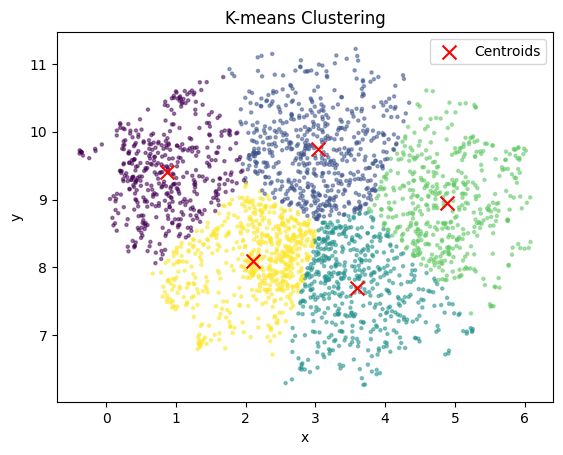

In [ ]:
# Scatter plot for data points
plt.scatter(df_umap_2['x'], df_umap_2['y'], c=model.labels_, s=5, alpha=0.5)

# Scatter plot for centroids
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')

# Set plot title and labels
plt.title('K-means Clustering')
plt.xlabel('x')
plt.ylabel('y')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Create a 3D scatter plot using Plotly Express
fig_1 = px.scatter(
    df_dim_date,  # DataFrame containing the data
    x='x',          # Column name for the x-axis values
    y='y',          # Column name for the y-axis values
    color='cluster',     # Column name for assigning colors based on cluster
    hover_data='topic_cleaned',  # Column name for additional information on hover
    size_max=10,         # Maximum size of the markers
    symbol = 'PM',
    color_discrete_map = {'C0':'pink', 'C1':'royalblue', 'C2':'darkturquoise', 'C3':'maroon', 'C4': 'orange'}          
)

# Customize the layout of the figure
fig_1.update_layout(
    height=800,  # Set the height of the figure
    width=1000   # Set the width of the figure
)

# Display the plot
fig_1.show()

# Generate HTML file with the plot
offline.plot(fig_1, filename='MS_NM_cluster.html')

'MS_NM_cluster.html'

In [ ]:
# Store the dataframe to csv file
df_dim_date.to_csv("E:\Tarang\Ashoka\Python\PYTHON PROJECT\df_umap_2.csv", index = False)

### Presidency-wise visualization

In [ ]:
df_dim_date

,index,x,y,PM,Date,cluster
0,MSS1,0.965321,9.223312,Manmohan Singh,2004,C0
1,MSS2,4.396095,7.197425,Manmohan Singh,2004,C2
2,MSS3,4.704985,7.830008,Manmohan Singh,2004,C2
3,MSS4,3.932616,7.069750,Manmohan Singh,2004,C2
4,MSS5,0.138507,9.010196,Manmohan Singh,2004,C0
...,...,...,...,...,...,...
2528,NMS1178,2.052044,8.872194,Narendra Modi,2023,C4
2529,NMS1179,2.768818,9.272061,Narendra Modi,2023,C1
2530,NMS1180,2.482742,7.692467,Narendra Modi,2023,C4
2531,NMS1181,1.993481,8.093008,Narendra Modi,2023,C4


In [ ]:
year_mapping = {2004: 'Year 1', 2005: 'Year 2', 2006: 'Year 3',2007: 'Year 4',2008: 'Year 5',2009: 'Year 6',2010: 'Year 7',2011: 'Year 8',2012: 'Year 9',2013: 'Year 10',2014: 'Year 11', 2017: 'Year 4',2018: 'Year 5',2019: 'Year 6',2020: 'Year 7',2021: 'Year 8',2022: 'Year 9', 2023: 'Year 10'}
df_dim_date['Year'] = df_dim_date['Date'].map(year_mapping)
df_dim_date

,index,x,y,PM,Date,cluster,topic_cleaned,Year
0,MSS1,0.965321,9.223312,Manmohan Singh,2004,C0,The author is exploring the need for reform in...,Year 1
1,MSS2,4.396095,7.197425,Manmohan Singh,2004,C2,The central theme of the text is rural develop...,Year 1
2,MSS3,4.704985,7.830008,Manmohan Singh,2004,C2,The central theme of the text is the empowerme...,Year 1
3,MSS4,3.932616,7.069750,Manmohan Singh,2004,C2,The author is exploring the role of science an...,Year 1
4,MSS5,0.138507,9.010196,Manmohan Singh,2004,C0,The central theme that the author is exploring...,Year 1
...,...,...,...,...,...,...,...,...
2528,NMS1178,2.052044,8.872194,Narendra Modi,2023,C4,"[, , A. The author is exploring the theme of e...",Year 10
2529,NMS1179,2.768818,9.272061,Narendra Modi,2023,C1,"[, , The central theme of the author is explor...",Year 10
2530,NMS1180,2.482742,7.692467,Narendra Modi,2023,C4,"[., , , , The central theme of the text is the...",Year 10
2531,NMS1181,1.993481,8.093008,Narendra Modi,2023,C4,"[, , The author is exploring the idea that the...",Year 10


In [ ]:
#import plotly.express as px
#fig = px.scatter(df_dim_date, x='x', y='y', color='cluster', symbol = 'PM', color_discrete_map = {'C0':'pink', 'C1':'royalblue', 'C2':'darkturquoise', 'C3':'maroon', 'C4': 'orange'}, 
#                facet_col='Year', facet_col_wrap=3, size_max = 12, hover_data = 'topic_cleaned')

#fig.update_layout(height=800, width=1000)
#fig.show() 

import plotly.express as px
import plotly.offline as offline

fig = px.scatter(df_dim_date, x='x', y='y', color='cluster', symbol = 'PM',
                 color_discrete_map={'C0':'pink', 'C1':'royalblue', 'C2':'darkturquoise', 'C3':'maroon', 'C4': 'orange'},
                 facet_col='Year', facet_col_wrap=3, size_max=12, hover_data='topic_cleaned')

fig.update_layout(height=800, width=1000)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

# Generate HTML file with the plot
offline.plot(fig, filename='MS_NM_year.html')


'MS_NM_year.html'

In [ ]:
import plotly.express as px

fig = px.scatter(df_dim_date, x='x', y='y', color='cluster', symbol='PM',
                 color_discrete_map={'C0':'pink', 'C1':'royalblue', 'C2':'darkturquoise', 'C3':'maroon', 'C4': 'orange'},
                 facet_row='PM', facet_col='Year', size_max=12, hover_data='topic_cleaned')

# Adjust the aspect ratio of each subplot
fig.update_layout(
    height=600,
    width=2000,
    autosize=False,
    scene=dict(
        aspectmode='cube',
        aspectratio=dict(x=1, y=1, z=1)
    )
)
fig.update_xaxes(matches=None)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

# Generate HTML file with the plot
offline.plot(fig, filename='MS_NM_presidency.html')


'MS_NM_presidency.html'

# Digression: sorting the meta_df according to clusters


In [ ]:
cluster_df= pd.concat([meta_df,df_dim_date['cluster']], axis=1)

In [ ]:
cluster_df

,index,Date,Title,Speech,Cleaned_Speech,Cleaned_Speech_string,cluster
0,MSS1,2004-06-24,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",['fellow citizen speak deep sense humility ful...,fellow citizen speak deep sense humility fully...,C0
1,MSS2,2004-06-29,PM's inaugural address at the Chief Ministers'...,"""I welcome you all to this Conference which w...",['welcome conference take stock effort rural d...,welcome conference take stock effort rural dev...,C2
2,MSS3,2004-07-03,"PM's inaugural address at the ""Dialogue on Min...","""It gives me great pleasure to be amongst you...","['give great pleasure amongst morning', 'parti...",give great pleasure amongst morning particular...,C2
3,MSS4,2004-07-26,PM's speech at the CSIR Society Meeting,"Distinguished Members of the CSIR Society, La...",['distinguished member csir society lady gentl...,distinguished member csir society lady gentlem...,C2
4,MSS5,2004-07-31,PM’ statement at the Press Conference,"\n\t""My two days in Bangkok have been very use...","['two day bangkok useful productive', 'first b...",two day bangkok useful productive first bimste...,C0
...,...,...,...,...,...,...,...
2528,NMS1178,2023-04-09,English rendering of PM’s address at the inaug...,My colleagues in the Union Cabinet Shri Bhupen...,['colleague union cabinet shri bhupender yadav...,colleague union cabinet shri bhupender yadav j...,C4
2529,NMS1179,2023-04-12,English rendering of PM’s address at training ...,Namaskar! \n\nThe campaign to provide governme...,"['namaskar', 'campaign provide government job ...",namaskar campaign provide government job youth...,C1
2530,NMS1180,2023-04-12,English rendering of PM’s address during flagg...,"Namaskar, Governor of Rajasthan Shri Kalraj Mi...",['namaskar governor rajasthan shri kalraj mish...,namaskar governor rajasthan shri kalraj mishra...,C4
2531,NMS1181,2023-04-14,English rendering of PM’s address at inaugurat...,"Governor of Assam Shri Gulab Chand Kataria ji,...",['governor assam shri gulab chand kataria ji c...,governor assam shri gulab chand kataria ji chi...,C4


In [ ]:
df_sorted = cluster_df.sort_values(by='cluster')
df_sorted

,index,Date,Title,Speech,Cleaned_Speech,Cleaned_Speech_string,cluster
0,MSS1,2004-06-24,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",['fellow citizen speak deep sense humility ful...,fellow citizen speak deep sense humility fully...,C0
580,MSS596,2007-11-19,PM's statement on the eve of departure to Sing...,I will be visiting Singapore from November 20t...,['visiting singapore november 20th 21st 2007 a...,visiting singapore november 20th 21st 2007 att...,C0
1463,NMS113,2018-02-25,"Text of PM's address at Auroville, Puducherry",I am happy to be here today on the occasion of...,['happy today occasion golden jubilee week aur...,happy today occasion golden jubilee week aurov...,C0
1465,NMS115,2018-02-27,Text of PM’s speech at India-Korea Business Su...,"Minister of Trade, Industry and Energy of the ...",['minister trade industry energy republic kore...,minister trade industry energy republic korea ...,C0
1469,NMS119,2018-03-10,English rendering of the Press Statement by Pr...,"My friend, Macron, the President of France,Res...",['friend macron president france respected mem...,friend macron president france respected membe...,C0
...,...,...,...,...,...,...,...
2014,NMS664,2021-04-22,Address by Prime Minister at the Leaders’ Summ...,"Your Excellency President Biden,\nDistinguishe...",['excellency president biden distinguished col...,excellency president biden distinguished colle...,C4
2020,NMS670,2021-05-21,English rendering of PM's interaction with doc...,Har Har Mahadev!I have been in constant touch ...,['har har mahadev constant touch taking input ...,har har mahadev constant touch taking input ge...,C4
1080,MSS1124,2012-02-02,PM's address at the12th Delhi Sustainable Deve...,“I am delighted to be here today at this inaug...,['delighted today inaugural session delhi sust...,delighted today inaugural session delhi sustai...,C4
2065,NMS715,2021-08-28,English rendering of PM's speech after dedicat...,Joining the event are Governor of Punjab Shri ...,['joining event governor punjab shri v p singh...,joining event governor punjab shri v p singh b...,C4


In [ ]:
cluster_sorted = open("cluster_sorted.pickle", "wb")
pickle.dump(df_sorted, cluster_sorted )
cluster_sorted.close()

In [ ]:
df_sorted.to_csv('output.csv')